<a href="https://colab.research.google.com/github/pranavpathak08/MLalgos/blob/main/Perceptron_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Using `make_classification` dataset from sklearn library

In [3]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=50, n_features=2, n_informative=2,  n_redundant=0, n_clusters_per_class=1, flip_y=0, class_sep=3, random_state=20)

In [6]:
print('Samples in the dataset :', X.shape[0])
print('Features in the dataset :', X.shape[1])

Samples in the dataset : 50
Features in the dataset : 2


In [7]:
y

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0])

Replacing all zeroes in `target vector y` with -1

In [10]:
y[y == 0] = -1
y

array([ 1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1,  1, -1, -1,  1,
        1, -1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1, -1,  1,
       -1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1,  1,  1, -1])

In [11]:
np.unique(y) ## Number of unique classes in y

array([-1,  1])

Visualising the data

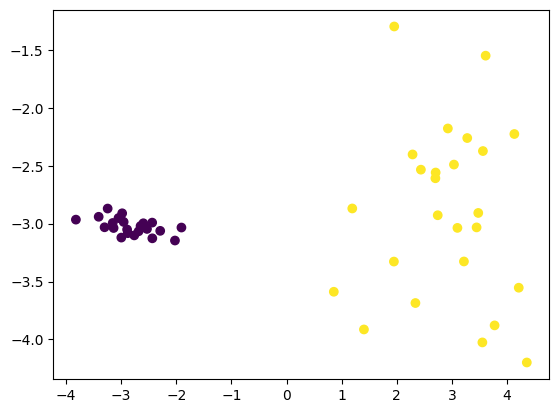

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y);

Intialising w to be a zero vector and its shape will be equal to the number of features in the dataset.

In [14]:
w = np.zeros(X.shape[1])
w

array([0., 0.])

Iterating over each data point $x$ in X one by one. Computing value of $w^Tx$, if the value >=0 , predict positive class for x, else predict the negative class.

In [16]:
w = np.zeros(X.shape[1])

for i in range(len(X)):
  y_pred = 1 if w.T@X[i] >=0 else -1
  print(y[i], y_pred)

1 1
1 1
1 1
1 1
1 1
1 1
1 1
-1 1
-1 1
1 1
-1 1
-1 1
-1 1
1 1
-1 1
-1 1
1 1
1 1
-1 1
1 1
-1 1
1 1
-1 1
-1 1
1 1
-1 1
1 1
-1 1
1 1
1 1
-1 1
1 1
-1 1
1 1
-1 1
1 1
1 1
-1 1
-1 1
-1 1
-1 1
1 1
1 1
-1 1
-1 1
-1 1
-1 1
1 1
1 1
-1 1


If prediction does not match the actual class label for any data point, update the weight vector `w_new = w_old + xy` where x is the data point and y is the actual label of x. We will also keep track of `total_mistakes` made by the algo

In [21]:
w = np.zeros(X.shape[1])
total_mistakes = 0

for i in range(len(X)):
  y_pred = 1 if w.T@X[i] >=0 else -1

  if y_pred!=y[i]:
    w = w + X[i]*y[i]
    total_mistakes +=1

print('Total mistakes :', total_mistakes)

Total mistakes : 2


running this algo for 10 epochs but stop running if no weight updates in an epoch.

In [22]:
w = np.zeros(X.shape[1])
total_mistakes = 0
epochs = 10
weight_updates_per_epoch = {}

for epoch in range(epochs):
  print('epoch :', epoch)
  weight_updates_per_epoch[epoch] = 0

  for i in range(len(X)):
    y_pred = 1 if w.T@X[i] >=0 else -1

    if y_pred != y[i]:
      w = w + X[i]*y[i]
      total_mistakes += 1
      weight_updates_per_epoch[epoch] += 1

  if weight_updates_per_epoch[epoch] == 0:
    break
  print('Total mistakes : ', total_mistakes)
  print(weight_updates_per_epoch)
  print(w)

epoch : 0
Total mistakes :  2
{0: 2}
[ 6.08372134 -0.97979197]
epoch : 1


Plotting the `weight vector w` and the decision boundary.

(-7.0, 7.0)

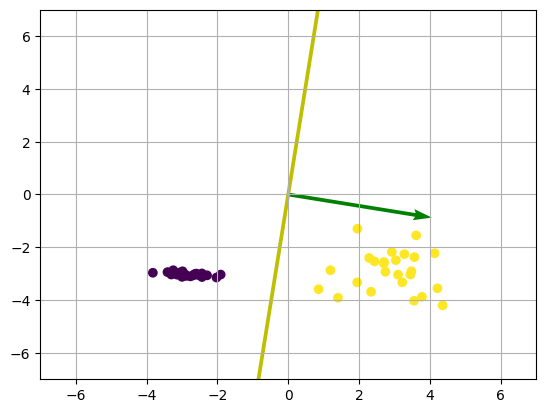

In [23]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.quiver(0, 0, w[0], w[1], scale=21, color = 'g')
plt.quiver(0, 0, -10*w[1], 10*w[0], scale=21, color = 'y', headaxislength = 0, headlength = 0)
plt.quiver(0, 0, 10*w[1], -10*w[0], scale=21, color = 'y', headaxislength = 0, headlength = 0)
plt.grid()
plt.xlim(-7, 7)
plt.ylim(-7, 7)